## XYZ Company Project

Author: Stellah Mishi Mnene

---

## Overview


## Business Understanding

### Objective
Determine the lowest risk aircraft for XYZ Company's aviation diversion

## Specific Objectives
1. Analyze the Distribution of Injury Severity by Aircraft Type

2. Examine Aircraft Damage Severity

3. Investigate the Relationship Between Operational Purpose and Incident Severity

4. Assess the Risk by Weather Conditions

5. Rank Aircraft Categories by Accident Risk

---

### Key Questions
What defines low risk in aviation?

Are there any specific factors influencing risks?


How can insights be actionable for decision-making? 

---

### Methodology

### Success Criteria
 Identify aircraft with the lowest probability of accidents or incidents, considering factors like injury severity, aircraft damage, and operational purpose. Develop a clear ranking or set of recommendations.

---

### Stakeholders
Strategic leaders - executives, head of aviation division and investors driving decisions

Operational teams- employees, customers, and manufacturers managing daily operations and outcomes

Tactical planners- analysts, finance, and regulators ensuring feasibility

---

## Data Understanding

In [221]:
# importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [222]:
df = pd.read_csv('AviationData.csv', encoding='latin-1')
df.head()

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [223]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,2.02212E+13,Accident,ERA23LA093,26/12/2022,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29/12/2022
88885,2.02212E+13,Accident,ERA23LA095,26/12/2022,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,2.02212E+13,Accident,WPR23LA075,26/12/2022,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27/12/2022
88887,2.02212E+13,Accident,WPR23LA076,26/12/2022,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,2.02212E+13,Accident,ERA23LA097,29/12/2022,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30/12/2022


In [224]:
df.shape

(88889, 31)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [226]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [227]:
# To check for missing values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

## Data Cleaning

#### Handling missing values

In [228]:
# To drop rows with too many missing values
threshold = len(df.columns) * 0.5  # Drop rows with >50% missing values
df.dropna(thresh=threshold, inplace=True)

In [229]:
# To fill in missing numerical data with the mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [230]:
# To fill in missing categorical data with mode
for col in df.select_dtypes(include=['object']):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [231]:
# To check if there ae missing values after handling
print("\nMissing Values After Handling:")
print(df.isnull().sum())


Missing Values After Handling:
Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64


In [232]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.000000,0.000000,0.000000,UNK,Cruise,Probable Cause,25/09/2020
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,4.0,0.000000,0.000000,0.000000,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.9222,-81.8781,NONE,Private,...,Personal,Pilot,3.0,0.279152,0.356862,5.272182,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,2.0,0.000000,0.000000,0.000000,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,332739N,0112457W,NONE,Private,...,Personal,Pilot,1.0,2.000000,0.356862,0.000000,VMC,Approach,Probable Cause,16/04/1980


#### Handling Duplicates

In [233]:
# To identify duplicate rows
duplicates = df.duplicated()

duplicate_count = duplicates.sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [234]:
# To identify specific columns
transposed_df = df.T

duplicated_columns = transposed_df.duplicated()

repeated_columns = transposed_df[duplicated_columns].index.tolist()

if repeated_columns:
    print("Repeated columns:")
    print(repeated_columns)
else:
    print("There are no repeated columns in the DataFrame.")

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001B231771D30>
Traceback (most recent call last):
  File "c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\matplotlib\transforms.py", line 200, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


There are no repeated columns in the DataFrame.


#### Handling Inconsistent Data
Handling inconsistensies in our dataframe will ensure that the  it is of high quality, and it mitigates misrepresentation thereby providing insights based off of accurate information.
In this case, inconsistent data can include typos and spelling errors, outliers and invalid values, conflicting data, data untry errorss, inconsistent formatting, and so on

##### Correcting data types

In [ ]:
# converting strings, integers and mixed formats representing dates and times into datetime objects
df['Event.Date'] = pd.to_datetime(df['Event.Date'])  
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'])

In [ ]:
# Converting each column under the list numerical_cols into integers for consistent and cleaner data
numerical_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col].round().astype('Int64'))

In [ ]:
# Converts the columns in the categorical_cols list into the categorical data type in the pandas DataFrame
categorical_cols = ['Investigation.Type', 'Accident.Number', 'Location', 'Country', 'Airport.Code', 'Airport.Name',
                   'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make', 'Model', 'Amateur.Built',
                   'Engine.Type', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',
                   'Report.Status']  
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [ ]:
# Overview of the unique values in the these two columns, to understand their categorical data
print(df['Injury.Severity'].unique())  
print(df['Aircraft.damage'].unique())


['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', 'Non-Fatal', ..., 'Fatal(89)', 'Fatal(57)', 'Fatal', 'Minor', 'Serious']
Length: 109
Categories (109, object): ['Fatal(2)', 'Fatal(4)', 'Fatal(3)', 'Fatal(1)', ..., 'Fatal(57)', 'Fatal', 'Minor', 'Serious']
['Destroyed', 'Substantial', 'Minor', 'Unknown']
Categories (4, object): ['Destroyed', 'Substantial', 'Minor', 'Unknown']


In [ ]:
# To check for invalid values in the column
invalid_fatal_injuries = df[(df['Total.Fatal.Injuries'] < 0)]
if not invalid_fatal_injuries.empty:
    print(f"Invalid Total.Fatal.Injuries values:\n{invalid_fatal_injuries}")

In [ ]:
# To check for invalid values in the column Number.of.Engines where the values are less than 0
invalid_engines = df[(df['Number.of.Engines'] < 0)]
if not invalid_engines.empty:
    print(f"Invalid Number.of.Engines values:\n{invalid_engines}")

In [ ]:
# To check for missing or null values in the Event.Date and Publication.Date columns
invalid_dates_event = df[df['Event.Date'].isnull()]
invalid_dates_publication = df[df['Publication.Date'].isnull()]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  category      
 2   Accident.Number         88889 non-null  category      
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88889 non-null  category      
 5   Country                 88889 non-null  category      
 6   Latitude                88889 non-null  object        
 7   Longitude               88889 non-null  object        
 8   Airport.Code            88889 non-null  category      
 9   Airport.Name            88889 non-null  category      
 10  Injury.Severity         88889 non-null  category      
 11  Aircraft.damage         88889 non-null  category      
 12  Aircraft.Category       88889 non-null  object

### Correcting Data Types

In [ ]:
# To get a summary of the distribution of categories in the Injury.Severity column
df['Injury.Severity'].value_counts()

Non-Fatal     68357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(83)         1
Fatal(143)        1
Fatal(28)         1
Fatal(26)         1
Fatal(125)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [ ]:
# Appending a new column called total injuries.
df['Total.Injuries'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Pilot,2,0,0,0,UNK,Cruise,Probable Cause,2020-09-25,2
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,...,Pilot,4,0,0,0,UNK,Unknown,Probable Cause,1996-09-19,4
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NONE,Private,...,Pilot,3,0,0,5,IMC,Cruise,Probable Cause,2007-02-26,8
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,...,Pilot,2,0,0,0,IMC,Cruise,Probable Cause,2000-12-09,2
4,20041105X01764,Accident,CHI79FA064,1979-02-08,"Canton, OH",United States,332739N,0112457W,NONE,Private,...,Pilot,1,2,0,0,VMC,Approach,Probable Cause,1980-04-16,3


In [ ]:
# This line of code extracts a specific pattern from the Aircraft.damage column and creates a new column Aircraft.Type
df['Aircraft.Type'] = df['Aircraft.damage'].str.extract(r'([A-Za-z0-9-]+)')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Total.Injuries,Aircraft.Type
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,2,0,0,0,UNK,Cruise,Probable Cause,2020-09-25,2,Destroyed
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,332739N,0112457W,NONE,Private,...,4,0,0,0,UNK,Unknown,Probable Cause,1996-09-19,4,Destroyed
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NONE,Private,...,3,0,0,5,IMC,Cruise,Probable Cause,2007-02-26,8,Destroyed
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,332739N,0112457W,NONE,Private,...,2,0,0,0,IMC,Cruise,Probable Cause,2000-12-09,2,Destroyed
4,20041105X01764,Accident,CHI79FA064,1979-02-08,"Canton, OH",United States,332739N,0112457W,NONE,Private,...,1,2,0,0,VMC,Approach,Probable Cause,1980-04-16,3,Destroyed


In [ ]:
# To have an overview of all the columns in the data frame 
# To check for unique values in the column Aircraft.Type
columns_list = df.columns.tolist()
print(columns_list)

print(df['Aircraft.Type'].unique())


['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Total.Injuries', 'Aircraft.Type']
['Destroyed' 'Substantial' 'Minor' 'Unknown']


In [ ]:
# Break down the Event.Date datetime column into separate columns for year, month, and day
df['Event.Year'] = df['Event.Date'].dt.year
df['Event.Month'] = df['Event.Date'].dt.month
df['Event.Day'] = df['Event.Date'].dt.day

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Event.Month,Event.Day,Time.Since.Publication,Fatal.Accident,Total.Fatal.Injuries_Avg,Has.Fatal.Injuries,Has.Serious.Injuries,Has.Minor.Injuries,Log.Total.Fatal.Injuries,Log.Total.Serious.Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,10,24,1521,0,0.362069,1,0,0,1.098612,0.000000
1,20020917X02327,Accident,LAX82FVM13,1982-03-27,"MORGAN HILL, CA",United States,332739N,0112457W,NONE,Private,...,3,27,15218,0,0.362069,1,0,0,1.609438,0.000000
2,20020917X02524,Accident,NYC82DA070,1982-04-14,"FACTORYVILLE, PA",United States,332739N,0112457W,NONE,SEAMANS,...,4,14,15200,0,0.362069,0,0,0,0.000000,0.000000
3,20020917X02734,Accident,ATL82DA137,1982-05-18,"HARTFORD, KY",United States,332739N,0112457W,NONE,Private,...,5,18,15166,0,0.362069,0,0,1,0.000000,0.000000
4,20020917X02684,Accident,ANC82DAG29,1982-05-31,"TALKEETNA, AK",United States,332739N,0112457W,NONE,Private,...,5,31,15153,0,0.362069,0,1,1,0.000000,0.693147


In [ ]:
# Calculate the number of days since the publication date for each row and stores it in the new column Time.Since.Publication.
# Useful for time-based analysis, such as how long it's been since a particular publication or event
df['Time.Since.Publication'] = (pd.Timestamp.now() - df['Publication.Date']).dt.days

In [ ]:
# Create a new column Fatal.Accident based on the values in the Injury.Severity column
# Useful for binary classification or analysis where you want to distinguish between fatal and non-fatal accidents
df['Fatal.Accident'] = df['Injury.Severity'].apply(lambda x: 1 if x == 'Fatal' else 0)

In [ ]:
# Create a new column in df called Total.Fatal.Injuries_Avg, which contains the average number of fatal injuries for each Make. 
# Useful because it will help to make comparisons in accidents between aircraft makes rather than to analyse individual accidents
make_avg_fatal = df.groupby('Make')['Total.Fatal.Injuries'].mean().reset_index()
df = df.merge(make_avg_fatal, on='Make', suffixes=('', '_Avg'))

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Aircraft.Type,Event.Year,Event.Month,Event.Day,Time.Since.Publication,Fatal.Accident,Total.Fatal.Injuries_Avg,Total.Fatal.Injuries_Avg,Total.Fatal.Injuries_Avg,Total.Fatal.Injuries_Avg
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Destroyed,1948,10,24,1521,0,0.362069,0.362069,0.362069,0.362069
1,20020917X02327,Accident,LAX82FVM13,1982-03-27,"MORGAN HILL, CA",United States,332739N,0112457W,NONE,Private,...,Destroyed,1982,3,27,15218,0,0.362069,0.362069,0.362069,0.362069
2,20020917X02524,Accident,NYC82DA070,1982-04-14,"FACTORYVILLE, PA",United States,332739N,0112457W,NONE,SEAMANS,...,Substantial,1982,4,14,15200,0,0.362069,0.362069,0.362069,0.362069
3,20020917X02734,Accident,ATL82DA137,1982-05-18,"HARTFORD, KY",United States,332739N,0112457W,NONE,Private,...,Substantial,1982,5,18,15166,0,0.362069,0.362069,0.362069,0.362069
4,20020917X02684,Accident,ANC82DAG29,1982-05-31,"TALKEETNA, AK",United States,332739N,0112457W,NONE,Private,...,Substantial,1982,5,31,15153,0,0.362069,0.362069,0.362069,0.362069


In [ ]:
# To check all the columns in the DataFrame
columns_list = df.columns.tolist()
print(columns_list)

['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Registration.Number', 'Make', 'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description', 'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date', 'Total.Injuries', 'Aircraft.Type', 'Event.Year', 'Event.Month', 'Event.Day', 'Time.Since.Publication', 'Fatal.Accident', 'Total.Fatal.Injuries_Avg', 'Total.Fatal.Injuries_Avg']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Event.Id                  88889 non-null  object        
 1   Investigation.Type        88889 non-null  category      
 2   Accident.Number           88889 non-null  category      
 3   Event.Date                88889 non-null  datetime64[ns]
 4   Location                  88889 non-null  category      
 5   Country                   88889 non-null  category      
 6   Latitude                  88889 non-null  object        
 7   Longitude                 88889 non-null  object        
 8   Airport.Code              88889 non-null  category      
 9   Airport.Name              88889 non-null  category      
 10  Injury.Severity           88889 non-null  category      
 11  Aircraft.damage           88889 non-null  category      
 12  Aircraft.Category 

In [ ]:
# To identify specific repeated columns
transposed_df = df.T

duplicated_columns = transposed_df.duplicated()

repeated_columns = transposed_df[duplicated_columns].index.tolist()

if repeated_columns:
    print("Repeated columns:")
    print(repeated_columns)
else:
    print("There are no repeated columns in the DataFrame.")

Repeated columns:
['Aircraft.Type', 'Total.Fatal.Injuries_Avg', 'Total.Fatal.Injuries_Avg', 'Total.Fatal.Injuries_Avg']


In [ ]:
# Drop duplicate columns while keeping the first occurrence
df = df.loc[:, ~df.columns.duplicated()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88889 entries, 0 to 88888
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Event.Id                  88889 non-null  object        
 1   Investigation.Type        88889 non-null  category      
 2   Accident.Number           88889 non-null  category      
 3   Event.Date                88889 non-null  datetime64[ns]
 4   Location                  88889 non-null  category      
 5   Country                   88889 non-null  category      
 6   Latitude                  88889 non-null  object        
 7   Longitude                 88889 non-null  object        
 8   Airport.Code              88889 non-null  category      
 9   Airport.Name              88889 non-null  category      
 10  Injury.Severity           88889 non-null  category      
 11  Aircraft.damage           88889 non-null  category      
 12  Aircraft.Category 

In [ ]:
# Create new columns in the DataFrame that indicate whether an accident involved specific types of injuries
df['Has.Fatal.Injuries'] = (df['Total.Fatal.Injuries'] > 0).astype(int)
df['Has.Serious.Injuries'] = (df['Total.Serious.Injuries'] > 0).astype(int)
df['Has.Minor.Injuries'] = (df['Total.Minor.Injuries'] > 0).astype(int)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Aircraft.Type,Event.Year,Event.Month,Event.Day,Time.Since.Publication,Fatal.Accident,Total.Fatal.Injuries_Avg,Has.Fatal.Injuries,Has.Serious.Injuries,Has.Minor.Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,332739N,0112457W,NONE,Private,...,Destroyed,1948,10,24,1521,0,0.362069,1,0,0
1,20020917X02327,Accident,LAX82FVM13,1982-03-27,"MORGAN HILL, CA",United States,332739N,0112457W,NONE,Private,...,Destroyed,1982,3,27,15218,0,0.362069,1,0,0
2,20020917X02524,Accident,NYC82DA070,1982-04-14,"FACTORYVILLE, PA",United States,332739N,0112457W,NONE,SEAMANS,...,Substantial,1982,4,14,15200,0,0.362069,0,0,0
3,20020917X02734,Accident,ATL82DA137,1982-05-18,"HARTFORD, KY",United States,332739N,0112457W,NONE,Private,...,Substantial,1982,5,18,15166,0,0.362069,0,0,1
4,20020917X02684,Accident,ANC82DAG29,1982-05-31,"TALKEETNA, AK",United States,332739N,0112457W,NONE,Private,...,Substantial,1982,5,31,15153,0,0.362069,0,1,1


#### Handling Skewness

In [ ]:
#  Managing skewness, handling zero values
df['Log.Total.Fatal.Injuries'] = np.log1p(df['Total.Fatal.Injuries'])
df['Log.Total.Serious.Injuries'] = np.log1p(df['Total.Serious.Injuries'])

#### Saving the Cleaned Data

In [ ]:
output_path = "Cleaned_AviationData.csv"
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to {output_path}")


Cleaned dataset saved to Cleaned_AviationData.csv


### Univariate Data Analysis

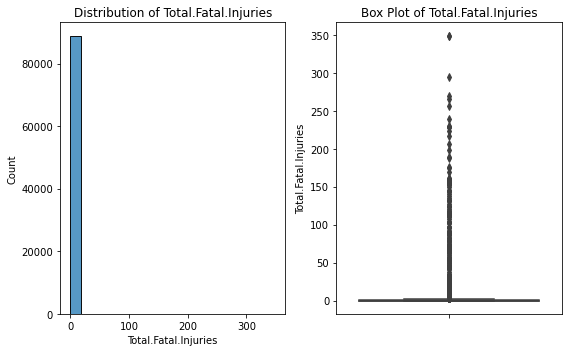

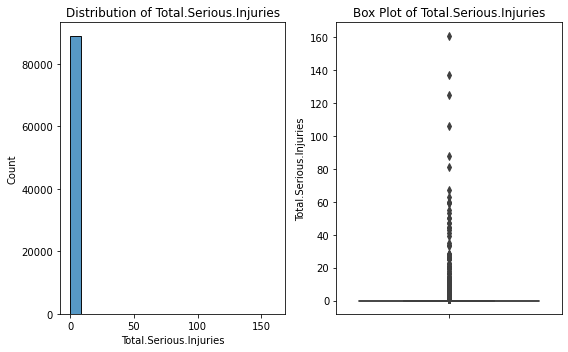

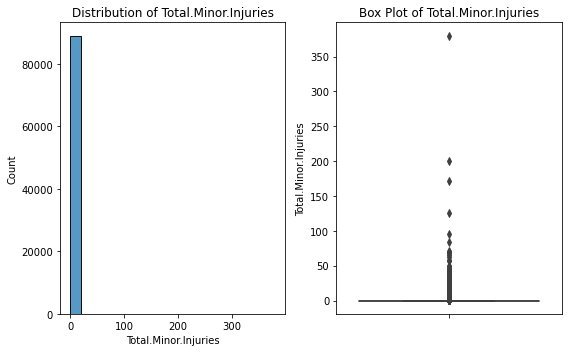

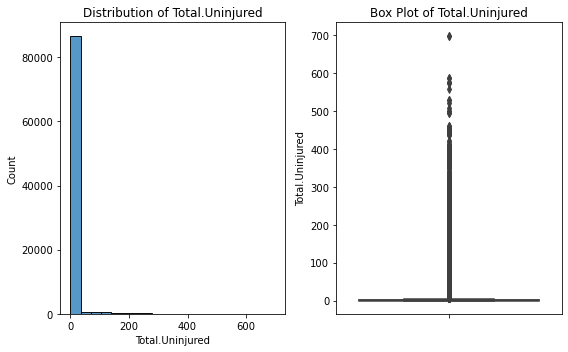

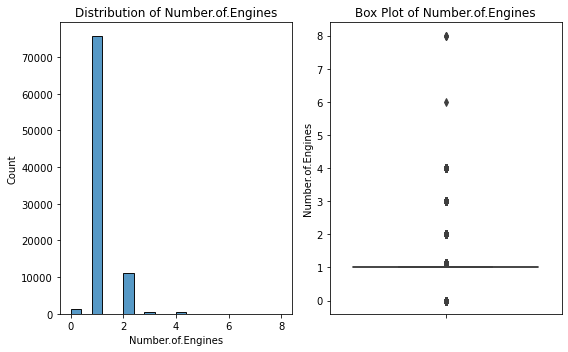

In [ ]:
numerical_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=20)
    plt.title(f'Distribution of {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

## Evaluation

Through data analysis, the following insights were drawn:
1. Countries with the most number of accidents were more likely to have more air traffic into the country.

2. Commercial flights had a significant number of accidents compared to private flights and non-civil flights. Non civil flights refers to military aviation, aerial work, general aviation etc.

3. Out of all accidents that occured, a significant of them caused substanial damage on the aircraft. Only a few caused minor damages to the aircraft.

4. The analysis revealed the airlines that were more prone to accidents than others

## Conclusion

From the analysis, the following action points are recommended:
1. The company should consider investing in countries with high traffic into those countries. Due to the fact that many people travel into these countries  there is a strong market for flight tickets into and out of those countries.

2. The company should also consider investing in other types of flights that are not commercial.

3. The company should consider opportunity cost that comes with venturing into the airline business. The risk of completely foregoing on their investments in the event of an accident.

4. The company should consider investing in Grumman Airline due to the low number of injuries and should avoid investing in Boeing airlines due to their extremely high number of injuries.